In [1]:
import networkx as nx
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from utils import monte_carlo_experiment

Исследование $T^{knn}$ в зависимости от параметра распределения

In [27]:
#Фиксируем параметры процедуры построения графа
K = 4          # число соседей для knn
n_sampels = 200     # число итераций
N = 400             # размер набора генерируемых данных
GRAPH_TYPE = 'knn'  # тип графа 
LAMBDA = 1


In [24]:
lambdas = np.arange(0.1, 100, 0.2) #сгенерировали набор лямбд 
results = {}


for l in tqdm(lambdas, desc="Processing"):
    params = {
            'graph_type': GRAPH_TYPE,
            'n': N,
            'x': K,
            'lambda': l
         }

    results[l] = monte_carlo_experiment(params, n_sampels)

Processing: 100%|██████████| 500/500 [07:36<00:00,  1.09it/s]


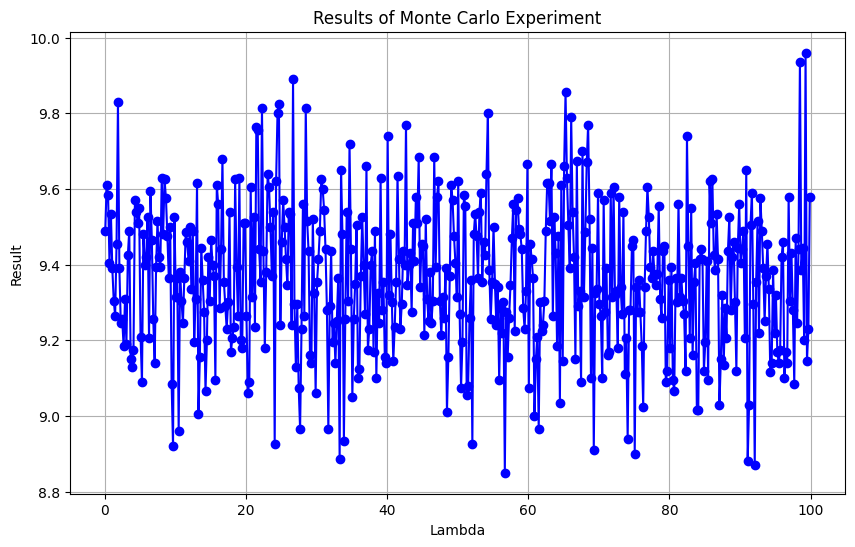

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(results.keys(), results.values(), marker='o', linestyle='-', color='b')
plt.title('Results of Monte Carlo Experiment')
plt.xlabel('Lambda')
plt.ylabel('Result')
plt.grid()
plt.show()

Как мы видим, число компонент связности почти не зависит от параметра lambda.

In [32]:
number_neighbors = np.arange(1, 15, 1) #сгенерировали набор лямбд 
results = {}


for k in tqdm(number_neighbors, desc="Processing"):
    params = {
            'graph_type': GRAPH_TYPE,
            'n': N,
            'x': k,
            'lambda': LAMBDA
         }

    results[k] = monte_carlo_experiment(params, n_sampels)

Processing: 100%|██████████| 14/14 [00:18<00:00,  1.33s/it]


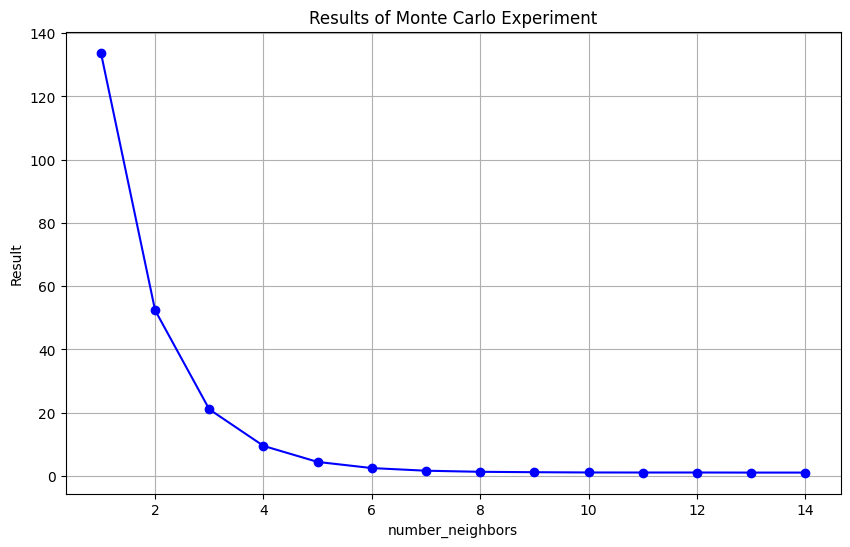

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(results.keys(), results.values(), marker='o', linestyle='-', color='b')
plt.title('Results of Monte Carlo Experiment')
plt.xlabel('number_neighbors')
plt.ylabel('Result')
plt.grid()
plt.show()